## Notebook 5: Encontrar os zeros de uma função

Encontrar o zero de uma função é uma tarefa muito comum na computação exploratória. Em matemática, é também designada por *encontrar a raiz*. O pacote `scipy` contém vários métodos para encontrar o valor (aproximado) do zero de uma função de uma ou mais variáveis. Neste Notebook, vamos programar dois métodos: o método da Bissecção e o método de Newton. No final do Notebook, utilizamos as funções correspondentes do `scipy` para obter os mesmos resultados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Método da Bissecção
O método da Bissecção é um método simples para encontrar o zero de uma função. O utilizador tem de especificar a função $f(x)$ e os dois valores de $x$, entre os quais $f(x)$ é zero: vamos chamar a estes dois pontos $x_1$ e $x_2$. Como $f(x)$ é igual a zero entre $x_1$ e $x_2$, significa que $f(x)$ é positivo em $x_1$ ou $x_2$ e negativo no outro ponto. Por outras palavras, o produto dos valores das duas funções é negativo: $f(x_1)f(x_2)<0$. Se esta condição for cumprida, sabemos apenas que $f(x)$ é zero no intervalo entre $x_1$ e $x_2$ (desde que $f(x)$ seja contínua, como é evidente). A ideia base do método da bissecção é iterar para o zero da função, reduzindo o intervalo para metade em todas as iterações. Isto pode ser alcançado através do cálculo do valor intermédio entre $x_1$ e $x_2$, vamos chamar-lhe ponto $x_m$, e calcular $f(x_m)$. Em seguida, substitua $x_1$ ou $x_2$ por $x_m$, certificando-se de que $f(x)$
permanece negativo num dos valores e positivo no outro. Repita o processo até que o intervalo seja pequeno o suficiente. Em suma, o algoritmo funciona da seguinte forma:

1. Calcule $f(x)$ em $x_1$ e $x_2$ e certifique-se de que $f(x_1)f(x_2)<0$.
2. Calcule $x_m = \frac{1}{2}(x_1+x_2)$.
3. Calcule $f(x_m)$.
4. Se $f(x_m)f(x_2)<0$, substitua $x_1$ por $x_m$, caso contrário, subtitua $x_2$ por $x_m$.
5. Teste se $|x_1-x_2|<\varepsilon$, em que $\varepsilon$ é uma tolerância especificada pelo utilizador. Se ainda não for, volte ao passo 2.

Recorde-se de que, em Python, uma função pode simplesmente passar como argumento de outra função. O exemplo abaixo contém uma função chamada `square_me`, que devolve o quadrado de qualquer função de uma variável, avaliado segundo o valor indicado de $x$. Por exemplo, `square_me` é utilizado com a função `cos`.

In [2]:
def square_me(func, x):
    return func(x) ** 2
print('resultado da função square_me :', square_me(np.cos, 4))
print('fazendo diretamente o quadrado  :', np.cos(4) ** 2)

resultado da função square_me : 0.427249983096
fazendo diretamente o quadrado  : 0.427249983096


### <a name="back1"></a> Exercício 1.
Escreva uma função Python para $f(x)=\frac{1}{2}-\text{e}^{-x}$. Crie uma representação gráfica de $f(x)$, em que o $x$ varie de 0 a 4. Repare que $f(x)$ tem um zero no intervalo representado (neste exemplo, não é complicado determinar o zero com exatidão, claro, e vamos fazê-lo mais tarde para testar se o nosso código funciona corretamente).

<a href="#ex1answer">Solução do Exerício 1</a>

### <a name="back2"></a>Exercício 2. Método da Bisecção
Implemente o método da Bissecção numa função chamada `bisection`. O método da `bissecção` deve assumir os seguintes argumentos:

1. A função para a qual quer encontrar o zero.
2. $x_1$ e $x_2$
3. O valor de tolerância  `tol` utilizado como critério de paragem. Torne `tol` num argumento de palavra-chave com o valor predefinido de 0.001.
4. O número máximo de iterações `nmax`. Torne `nmax` num argumento de palavra-chave com um valor predefinido de 10, por exemplo.

A sua função deve devolver o valor de $x$, em que $f(x)$ é igual a zero (aproximadamente). A sua função deve apresentar um aviso no ecrã quando o número máximo de iterações é atingido antes de a tolerância ser cumprida.

Ao escrever o código, implemente os passos 2 a 5 do algoritmo suprarreferido num ciclo regular, que executa até `nmax` vezes e que interrompe o ciclo (através do comando `break`) quando a tolerância é cumprida. Esta ação vai impedir que fique retido num ciclo infinito, o que pode ocorrer se utilizar um ciclo `while`.
Quando escreve o seu código, é recomendável que apresente os valores de $x_1$, $x_2$, $f(x_1)$, e $f(x_2)$ no ecrã em todas as iterações, o que permite observar a forma como a função `bisection` funciona (ou se existem erros por resolver).

Utilize o método da `bissecção` para encontrar o zero da função $f(x)$ que programou no passo 1 e certifique-se de que está dentro de `tol=0.001` do valor exato.

Demonstre que o método da `bissecção` funciona corretamente ao encontrar o zero de cos($x$) entre $x_1=0$ e $x_2=3$
executando o seguinte comando:

`bisection(np.cos, 0, 3, tol=1e-6, nmax=30)`

<a href="#ex2answer">Solução do Exercício 2</a>

### Método de Newton

O método da Bissecção é um método forçado que garante o funcionamento quando o utilizador especifica um intervalo de $x_1$ a $x_2$ que contém um zero (e a função é contínua). O método da Bissecção não é muito eficaz (requer bastantes avaliações da função) e não é conveniente que o utilizador tenha de especificar um intervalo que contém o zero. Uma alternativa mais inteligente é o método de Newton (também designado por método Newton-Raphson), embora não seja garantido que funcione sempre, conforme explicado abaixo.

Vamos tentar encontrar o zero da função representada pela linha azul no gráfico que se segue. O método de Newton começa numa localização inicial definida pelo utilizador, designada por $x_0$, e que é aqui representada pelo ponto azul. Uma linha reta é ajustada através do ponto $(x,y)=(x_0,f(x_0))$ de forma que a linha seja tangente a $f(x)$ em $x_0$ (a linha vermelha). A interseção da linha vermelha com o eixo horizontal é a próxima estimativa $x_1$ do zero da função (o ponto vermelho). Este processo continua até ser encontrado um valor de $f(x)$ que seja suficientemente pequeno. Assim, uma linha reta é ajustada através do ponto $(x,y)=(x_1,f(x_1))$, novamente tangente à função, e a interseção desta linha com o eixo horizontal é a próxima estimativa melhor do zero da função, etc.


<img src="http://i.imgur.com/tK1EOtD.png" alt="Newton's method on wikipedia">

A equação para uma linha reta com um declive $a$ e através do ponto $x_n,f(x_n)$ é:

$$y = a(x-x_n) + f(x_n)$$

Uma vez que pretendemos que a linha seja tangente à função $f(x)$ no ponto $x=x_n$, o declive $a$ é igual à derivada de $f(x)$ em $x_n$: $a=f'(x_n)$. Para encontrar a interseção da linha com o eixo horizontal, temos de encontrar o valor de $x$ que resulta em $y=0$. Esta é a nossa próxima estimativa $x_{n+1}$ do zero da função. Assim, temos de resolver:

$$0 = f'(x_n) (x_{n+1}-x_n) + f(x_n)$$

cujo resultado é:

$$\boxed{x_{n+1} = x_n - f(x_n)/f'(x_n)}$$

A procura está concluída quando $|f(x)|$ é inferior a uma tolerância especificada pelo utilizador. Na Wikipédia, pode encontrar uma ilustração animada do método de Newton (vamos aprender como fazer animações interessantes desse tipo num Notebook posterior).

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method on wikipedia" width="400px">

O método de Newton é um meio comprovado para encontrar o zero de uma função, se a função for *bem comportada* e a procura começar *suficientemente próxima* do zero. Se estas duas condições forem cumpridas, o método de Newton é bastante rápido. Se não forem cumpridas, o método não converge para zero. Outra desvantagem do método de Newton é o facto de ter de definir a derivada da função. Curiosamente, o valor da função não tem de diminuir em cada iteração (conforme ilustrado na animação acima, que vai de $x_2$ a $x_3$).

### <a name="back3"></a>Exercício 3.  Método de Newton
Implemente o método de Newton numa função Python chamada `newtonsmethod` e teste a sua função, encontrando o zero de $f(x)=\frac{1}{2}-\text{e}^{-x}$, como no Exercício 1. Utilize $x_0=1$ como ponto inicial da procura. A função `newtonsmethod` deve assumir os seguintes argumentos:

1. A função para a qual quer encontrar o zero.
2. A derivada da função para a qual quer encontrar o zero.
3. O ponto inicial da procura $x_0$.
4. O valor de tolerância `tol` utilizado como critério de paragem. Torne `tol` num argumento de palavra-chave com o valor predefinido de $10^{-6}$.
5. O número máximo de iterações `nmax`. Torne `nmax` num argumento de palavra-chave com o valor predefinido de 10.

A sua função deve devolver o valor de $x$, em que $f(x)$ é igual a zero (aproximadamente). A sua função deve apresentar um aviso no ecrã quando o número máximo de iterações é atingido antes de a tolerância ser cumprida.

Recomenda-se que, ao desenvolver o seu script, apresente o valor de $x_{n+1}$ e o valor da função correspondente no ecrã de todas as iterações para saber se a sua função está a progredir da forma que pretende. Se implementar tudo corretamente, deve encontrar o zero que apresenta um valor da função inferior a $10^{-6}$ dentro de 3 iterações, se começar em $x=1$. Quantas iterações são necessárias quando começa em $x=4$?

<a href="#ex3answer">Solução do Exercício 3</a>

### <a name="back4"></a>Exercício 4.
Demonstre que a sua função `newton` funciona ao encontrar o zero de $\sin(x)$. Como sabe, a função $\sin(x)$ dispõe de vários zeros: $-2\pi$, $-\pi$, $0$, $pi$, $2\pi$, etc. Qual é o zero que encontra ao começar em $x=1$ e ao começar em $x=1.5$?

<a href="#ex4answer">Solução do Exercício 4</a>

### Métodos para encontrar a raiz no `scipy`
O pacote `scipy.optimize` inclui diversas rotinas para minimizar uma função e encontrar os zeros de uma função. Como já seria de prever, os métodos de encontrar a raiz são designados por `bisect` e `newton`. No entanto, o método de encontrar a raiz mais utilizado é o `fsolve`. `fsolve` representa uma vantagem adicional que consiste no facto de estimar a derivada da função, se não conseguir (ou não quiser) fazê-lo. `fsolve` pode ainda ser utilizado para encontrar uma resposta (aproximada) para um sistema não linear de equações, mas não faremos aqui esse exercício. 

### <a name="back5"></a>Exercício 5. `fsolve` 
Utilize o método `fsolve` do pacote `scipy.optimize` para encontrar o valor de $x$ para o qual $\ln(x^2)=2$ (ou seja, encontrar o zero da função $\ln(x^2)-2$), e demonstre que o valor de $x$ é, efetivamente, de $\ln(x^2)=2$.

<a href="#ex5answer">Solução do Exercício 5</a>

### <a name="back6"></a>Exercício 6. Representar graficamente o zero
Represente graficamente a função $f(x)=x+2\cos(x)$ para valores de $x$ entre -2 e 4. No mesmo gráfico, posicione um ponto vermelho na localização em que $f(x)=0$. Como é evidente, tem de encontrar esta localização com um dos métodos que aprendeu neste Notebook.

<a href="#ex6answer">Solução do Exercício 6</a>

### Soluções dos exercícios

<a name="ex1answer">Solução do Exercício 1</a>

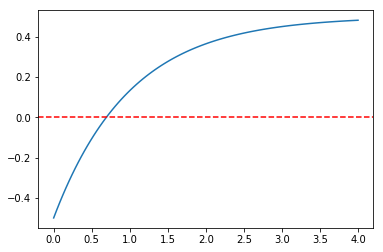

In [3]:
def f(x):
    return 0.5 - np.exp(-x)

x = np.linspace(0, 4, 100)
y = f(x)
plt.plot(x, y)
plt.axhline(0, color='r', ls='--')

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Solução do Exercício 2</a>

In [4]:
def bisection(func, x1, x2, tol=1e-3, nmax=10, silent=True):
    f1 = func(x1)
    f2 = func(x2)
    assert f1 * f2< 0, 'Error: não há zero no intervalo x1-x2'
    for i in range(nmax):
        xm = 0.5*(x1 + x2)
        fm = func(xm)
        if fm * f2 < 0:
            x1 = xm
            f1 = fm
        else:
            x2 = xm
            f2 = fm
        if silent is False: print(x1, x2, f1, f2)
        if abs(x1 - x2) < tol:
            break
    if abs(func(x1)) > tol:
        print('Número máximo de iterações atingidas')
    return x1

In [5]:
xzero = bisection(func=f, x1=0, x2=4, nmax=20)  
print('zero da função e valor da função: ', xzero, f(xzero))  

zero da função e valor da função:  0.6923828125 -0.000382330131828


In [6]:
xzero = bisection(func=np.cos, x1=0, x2=3, tol=1e-6, nmax=30)
print('cos(x) é zero entre 0 e pi em:', xzero)
print('erro relativo:', (xzero - np.pi / 2) / (np.pi / 2))

cos(x) é zero entre 0 e pi em: 1.570796012878418
erro relativo: -1.9984543714192042e-07


<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Solução do Exercício 3</a>

In [7]:
def fp(x):
    return np.exp(-x)

In [8]:
def newtonsmethod(func, funcp, xs, tol=1e-6, nmax=10, silent=True):
    f = func(xs)
    for i in range(nmax):
        fp = funcp(xs)
        xs = xs - f/fp
        f = func(xs)
        if silent is False: print(xs, func(xs))
        if abs(f) < tol: 
            print('tolerância atingida em', i+1, 'iterações')
            break
    if abs(f) > tol:
        print('Número máximo de iteraçoes atingido antes da convergência')
    return xs

In [9]:
print('começando em x=1')
xzero = newtonsmethod(func=f, funcp=fp, xs=1)
print('xzero, f(xzero) ', xzero, f(xzero))

print('começando em x=4')
xzero = newtonsmethod(func=f, funcp=fp, xs=4, nmax=40)
print('xzero, f(xzero) ', xzero, f(xzero))

começando em x=1
tolerância atingida em 3 iterações
xzero, f(xzero)  0.693146278462 -4.5104915336e-07
começando em x=4
tolerância atingida em 28 iterações
xzero, f(xzero)  0.693147180453 -5.36808375529e-11


<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Solução do Exercício 4</a>

In [10]:
xzero = newtonsmethod(func=np.sin, funcp=np.cos, xs=1)
print('ponto inicial é x=1')
print('xzero, sin(xzero):', xzero, np.sin(xzero))

xzero = newtonsmethod(func=np.sin, funcp=np.cos, xs=1.5)
print('ponto inicial é x=1.5')
print('xzero, sin(xzero):', xzero, np.sin(xzero))
print('xzero / pi:', xzero / np.pi)

tolerância atingida em 4 iterações
ponto inicial é x=1
xzero, sin(xzero): 2.92356620141e-13 2.92356620141e-13
tolerância atingida em 3 iterações
ponto inicial é x=1.5
xzero, sin(xzero): -12.5663706144 -1.28649811974e-15
xzero / pi: -4.0


<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Solução do Exercício 5</a>

In [11]:
from scipy.optimize import fsolve
def h(x):
    return np.log(x ** 2) - 2

x0 = fsolve(h, 1)
print('x0, valor da função', x0, h(x0))

x0, valor da função [ 2.71828183] [ -1.02140518e-14]


<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Solução do Exercício 6</a>

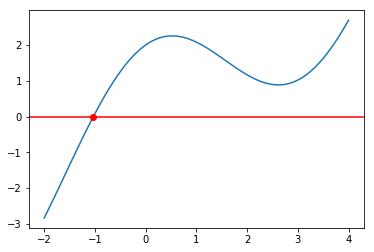

In [12]:
from scipy.optimize import fsolve
def g(x):
    return x + 2 * np.cos(x)
x = np.linspace(-2, 4, 100)
x0 = fsolve(g, 1)
plt.plot(x, g(x))
plt.plot(x0, g(x0), 'ro')
plt.axhline(y=0, color='r')

<a href="#back6">Voltar ao Exercício 6</a>

A obra "Notebook 5: Encontrar os zeros de uma função" é um derivado de [Notebook 5: Finding the zero of a function](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook5_rootfinding/py_exploratory_comp_5_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a licença CC BY (4.0 Licença Internacional).
"Notebook 5: Encontrar os zeros de uma função" é publicado sob a licença CC BY (4.0 Licença Internacional) por Educa2030.